# Mental Health Chatbot

Student names/Student IDs	
* Hardik (C0913846)* 
Rahul Mehta(C0910406
* Shubham (C0911596)
* Tanmay Sharma(C0912911)
* Nipun Narang (C0910386))386)


# Abstract 
The Mental Health Chatbot is created so that it can provide assistance and corresponding information to people who are battling mental health disorders by mimicking and answering back those queries through natural language processing technologies. By drawing on a corpus of different mental health subreddits, this project applies advanced machine learning models to recognize and reply to an input as well as distill useful advice before the arrival of professional help, if applicable. Besides utilizing up-to-date technologies such as BERT and SVM the chatbot is empowered to understand and sense the meaning and context of questions thereby the conversation becomes more meaningful and boosts the emotional support. It serves as the first and most easily accessible tool for those who have mental health problems and would like to overcome them in a more effective way. It facilitates getting help and supplies guidance and resources.

# Introduction
Mental health is a part of the basics of health, and still the biggest integer source of demographic marginals across the world do suffer from inaccessibility of required care delivery services and education due to geographical, economic, and social barriers. As such, our project aims at developing a Mental Health Chatbot to meet the growing need for immediate-available and scalable support. Innovation is the core of this chatbot which is based on sophisticated NLP technologies, the chatbot analyzes and answers user's questions using data of Reddit's mental health communities for high effectiveness. By re-enacting concessionary chitchat that is informative and empathetic, the chatbot does so paving way for initial advice which assists to shorten gap existing between people seeking help and resources availed for them.
The accelerated efforts of the community-based innovative efforts have intensified during the recent global challenges, that have further convinced the residents everywhere of the world to feel alone and kept them under stressful circumstances. The conversational AI agent employed here acquires the ability to figure out health issues that are discussed as either common ones such as anxiety and depression or difficult ones that include PTSD and bipolar disorder by tapping into a huge dataset that accumulates the discussions about mental health. This chatbot exploits the to-of-the-art machine learning algorithms, which are BERT for understanding context and SVM for predictive precision, it answers the questions in the way that is contextually aware and emotionally bonded. This project constitutes a considerable improvement on mental health support accessibility, offering an important tool for those who would otherwise survive neglected and questionable.


## Importing Libraries

In [1]:
import praw
import pandas as pd
import numpy as np
import csv
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import f1_score, precision_score
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import sys
import joblib
from PyQt5.QtWidgets import QApplication, QMainWindow, QTextEdit, QLineEdit, QVBoxLayout, QWidget, QPushButton
from PyQt5.QtGui import QPixmap, QPainter
from PyQt5.QtWidgets import QGraphicsBlurEffect

# Mental Health Problems Data Scraping

In [ ]:
reddit = praw.Reddit(
    client_id='6wTqIp51sp8fl2YcMfp_5A',
    client_secret=None,
    user_agent='Deads_hot',
) #importing data from reddit based on the above customizations

subreddit_names = [
    'depression',
    'Anxiety',
    'BipolarReddit',
    'ADHD',
    'OCD',
    'ptsd',
    'EatingDisorders',
    'Schizophrenia',
    'BPD',
    'socialanxiety',
    'GAD',
    'HealthAnxiety',
    'PanicAttack',
    'Agoraphobia',
    'CPTSD',
    'AvPD',
    'DID',
    'Mindfulness'
]

num_posts = 20000


combined_subreddits = '+'.join(subreddit_names) #combining subreddits using +


subreddit = reddit.subreddit(combined_subreddits) #fetching top comments
top_posts = subreddit.top(limit=num_posts)


columns = ['id', 'author', 'created_utc', 'score', 'num_comments', 'permalink', 'url', 'is_self', 'is_hidden', 'stickied', 'subreddit', 'upvote_ratio', 'title', 'selftext', 'is_saved','solution','related_link'] # columns for the csv file 


with open('reddit_posts.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=columns)
    writer.writeheader() #opening CSV file 

    
    for post in top_posts:
        try:
            is_saved = post.saved #giving comments to the top posts
        except AttributeError:
            is_saved = False

        writer.writerow({
            'id': post.id,
            'author': str(post.author),
            'created_utc': post.created_utc,
            'score': post.score,
            'num_comments': post.num_comments,
            'permalink': f"https://reddit.com{post.permalink}",
            'url': post.url,
            'is_self': post.is_self,
            'is_hidden': post.hidden,
            'stickied': post.stickied,
            'subreddit': str(post.subreddit),
            'upvote_ratio': post.upvote_ratio,
            'title': post.title,
            'selftext': post.selftext,
            'is_saved': is_saved,
            'solution': post.solution,
            'related_link': post.related_links
        })

print("Data has been saved to reddit_posts.csv")

Data has been saved to reddit_posts.csv


In [32]:
df=pd.read_csv("reddit_posts.csv") #reading csv

In [33]:
df.shape

(16951, 17)

In [34]:
df.head()

,id,author,created_utc,score,num_comments,permalink,url,is_self,is_hidden,stickied,subreddit,upvote_ratio,title,selftext,is_saved,solution,related_links
0,6yrl8n,rhcpkam,1504833460,27941,395,https://reddit.com/r/socialanxiety/comments/6y...,https://i.redd.it/chzkq41z8kkz.jpg,False,False,False,socialanxiety,0.94,Every time,NaN,False,"For managing social anxiety disorder, cognitiv...",http://www.socialanxietyassociation.org/
1,6b7jkd,supbuds,1494811713,26399,509,https://reddit.com/r/socialanxiety/comments/6b...,https://i.redd.it/abudcka6hkxy.jpg,False,False,False,socialanxiety,0.95,"""social anxiety""",NaN,False,"For managing social anxiety disorder, cognitiv...",http://www.socialanxietyassociation.org/
2,8u8ah2,smth-abt,1530092720,19939,237,https://reddit.com/r/socialanxiety/comments/8u...,https://i.redd.it/7b5mc0wpli611.jpg,False,False,False,socialanxiety,0.96,Too sensitive?,NaN,False,"For managing social anxiety disorder, cognitiv...",http://www.socialanxietyassociation.org/
3,8x94lb,NaN,1531119379,13371,166,https://reddit.com/r/socialanxiety/comments/8x...,https://i.redd.it/t0v7g5fhev811.jpg,False,False,False,socialanxiety,0.96,It’s me every freakin day lmao 🤣,NaN,False,"For managing social anxiety disorder, cognitiv...",http://www.socialanxietyassociation.org/
4,7imuj6,NaN,1512827913,13175,194,https://reddit.com/r/socialanxiety/comments/7i...,https://imgur.com/9eznJh1,False,False,False,socialanxiety,0.94,Anyone else?,NaN,False,"For managing social anxiety disorder, cognitiv...",http://www.socialanxietyassociation.org/


In [35]:
df.notnull().sum() #checking for the non null values

id               16951
author           14519
created_utc      16951
score            16951
num_comments     16951
permalink        16951
url              16951
is_self          16951
is_hidden        16951
stickied         16951
subreddit        16951
upvote_ratio     16951
title            16951
selftext         11927
is_saved         16951
solution         16951
related_links    16951
dtype: int64

In [36]:
df = df.drop(df[df['selftext'].isna() | (df['selftext'] == '')].index) #Dropping the null value rows for selftext column

In [37]:
df.shape

(11927, 17)

In [38]:
df.isnull().sum()

id                  0
author           1681
created_utc         0
score               0
num_comments        0
permalink           0
url                 0
is_self             0
is_hidden           0
stickied            0
subreddit           0
upvote_ratio        0
title               0
selftext            0
is_saved            0
solution            0
related_links       0
dtype: int64

In [39]:
df.columns.value_counts() # checking value colunts for each columns

id               1
stickied         1
solution         1
is_saved         1
selftext         1
title            1
upvote_ratio     1
subreddit        1
is_hidden        1
author           1
is_self          1
url              1
permalink        1
num_comments     1
score            1
created_utc      1
related_links    1
Name: count, dtype: int64

In [40]:
df.duplicated().sum() #checking duplicates

0

In [41]:
df.head()

,id,author,created_utc,score,num_comments,permalink,url,is_self,is_hidden,stickied,subreddit,upvote_ratio,title,selftext,is_saved,solution,related_links
6,pelip6,VitaminNutrient,1630340728,12802,890,https://reddit.com/r/ADHD/comments/pelip6/how_...,https://www.reddit.com/r/ADHD/comments/pelip6/...,True,False,False,ADHD,0.98,How I cured my adhd permanently,"I've been suffering from adhd my whole life, f...",False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...
14,ioi1my,beatadhd,1599519237,9594,625,https://reddit.com/r/ADHD/comments/ioi1my/i_we...,https://www.reddit.com/r/ADHD/comments/ioi1my/...,True,False,False,ADHD,1.00,I went through 700 reddit comments and collect...,So there was that awesome [Reddit thread](http...,False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...
16,jeyfps,XxItsNowOrNever99xX,1603227382,9552,332,https://reddit.com/r/ADHD/comments/jeyfps/adhd...,https://www.reddit.com/r/ADHD/comments/jeyfps/...,True,False,False,ADHD,1.00,ADHD for me is laying down on my couch using m...,It’s not like I don’t care. I’m stressed out o...,False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...
17,jjd6hl,NaN,1603843302,9463,360,https://reddit.com/r/ADHD/comments/jjd6hl/it_f...,https://www.reddit.com/r/ADHD/comments/jjd6hl/...,True,False,False,ADHD,1.00,It feels like there aren’t enough hours in the...,IM OVER IT.,False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...
19,kre725,radically_unoriginal,1609900170,9294,670,https://reddit.com/r/ADHD/comments/kre725/its_...,https://www.reddit.com/r/ADHD/comments/kre725/...,True,False,False,ADHD,0.99,It's so damn irritating to be intelligent with...,So I've always been told I'm smart by people w...,False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...


In [42]:
df.tail()

,id,author,created_utc,score,num_comments,permalink,url,is_self,is_hidden,stickied,subreddit,upvote_ratio,title,selftext,is_saved,solution,related_links
16943,ctd2xc,Vhirann,1566370226,7,2,https://reddit.com/r/Gad/comments/ctd2xc/your_...,https://www.reddit.com/r/Gad/comments/ctd2xc/y...,True,False,False,Gad,0.9,Your mom,My dick,False,For managing Generalized Anxiety Disorder (GAD...,http://www.adaa.org/
16945,2epz4c,mramorgan,1409144329,6,1,https://reddit.com/r/Gad/comments/2epz4c/gener...,https://www.reddit.com/r/Gad/comments/2epz4c/g...,True,False,False,Gad,1.0,General Anxiety Disorder,Anybody out there finding medication/treatment...,False,For managing Generalized Anxiety Disorder (GAD...,http://www.adaa.org/
16946,56oozl,Jellybeankween19,1476052439,6,4,https://reddit.com/r/Gad/comments/56oozl/need_...,https://www.reddit.com/r/Gad/comments/56oozl/n...,True,False,False,Gad,1.0,Need some advice from someone with GAD or some...,I need some advice from someone with aniexty o...,False,For managing Generalized Anxiety Disorder (GAD...,http://www.adaa.org/
16948,bo72fz,Avenger018,1557771391,2,1,https://reddit.com/r/Gad/comments/bo72fz/is_it...,https://www.reddit.com/r/Gad/comments/bo72fz/i...,True,False,False,Gad,1.0,Is it possible?,Can a GAD be late for all the days in college?,False,For managing Generalized Anxiety Disorder (GAD...,http://www.adaa.org/
16950,cnulmw,NaN,1565310485,1,0,https://reddit.com/r/Gad/comments/cnulmw/hello...,https://www.reddit.com/r/Gad/comments/cnulmw/h...,True,False,False,Gad,1.0,Hello @dfbb,"As you probably guessed, this is Fang, again. ...",False,For managing Generalized Anxiety Disorder (GAD...,http://www.adaa.org/


In [43]:
df.columns # printing columns present

Index(['id', 'author', 'created_utc', 'score', 'num_comments', 'permalink',
       'url', 'is_self', 'is_hidden', 'stickied', 'subreddit', 'upvote_ratio',
       'title', 'selftext', 'is_saved', 'solution', 'related_links'],
      dtype='object')

In [44]:
df.dtypes # datatypes for each column

id                object
author            object
created_utc        int64
score              int64
num_comments       int64
permalink         object
url               object
is_self             bool
is_hidden           bool
stickied            bool
subreddit         object
upvote_ratio     float64
title             object
selftext          object
is_saved            bool
solution          object
related_links     object
dtype: object

In [45]:
print('Length of the column Selftext:',len(df['selftext']))
print('Length of the column Solution:',len(df['solution'])) #showing length for both the columns

Length of column Selftext is: 11927
Length of column Solution is: 11927


# EDA

In [46]:
df.shape

(11927, 17)

In [47]:
df.describe() # statistical analysis

,created_utc,score,num_comments,upvote_ratio
count,1.192700e+04,11927.000000,11927.000000,11927.000000
mean,1.620754e+09,758.033957,95.509768,0.985940
std,4.516956e+07,1149.243558,274.828461,0.021073
min,1.306741e+09,1.000000,0.000000,0.720000
25%,1.591956e+09,92.000000,18.000000,0.980000
50%,1.615900e+09,178.000000,43.000000,0.990000
75%,1.654218e+09,1047.000000,106.000000,1.000000
max,1.712024e+09,12802.000000,18657.000000,1.000000


In [48]:
df.info() #informational aalysis of the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 11927 entries, 6 to 16950
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11927 non-null  object 
 1   author         10246 non-null  object 
 2   created_utc    11927 non-null  int64  
 3   score          11927 non-null  int64  
 4   num_comments   11927 non-null  int64  
 5   permalink      11927 non-null  object 
 6   url            11927 non-null  object 
 7   is_self        11927 non-null  bool   
 8   is_hidden      11927 non-null  bool   
 9   stickied       11927 non-null  bool   
 10  subreddit      11927 non-null  object 
 11  upvote_ratio   11927 non-null  float64
 12  title          11927 non-null  object 
 13  selftext       11927 non-null  object 
 14  is_saved       11927 non-null  bool   
 15  solution       11927 non-null  object 
 16  related_links  11927 non-null  object 
dtypes: bool(4), float64(1), int64(3), object(9)
memory usag

In [49]:
df.dtypes

id                object
author            object
created_utc        int64
score              int64
num_comments       int64
permalink         object
url               object
is_self             bool
is_hidden           bool
stickied            bool
subreddit         object
upvote_ratio     float64
title             object
selftext          object
is_saved            bool
solution          object
related_links     object
dtype: object

In [50]:
df.drop('author', axis=1, inplace=True) #droping author column

In [51]:
df.head()

,id,created_utc,score,num_comments,permalink,url,is_self,is_hidden,stickied,subreddit,upvote_ratio,title,selftext,is_saved,solution,related_links
6,pelip6,1630340728,12802,890,https://reddit.com/r/ADHD/comments/pelip6/how_...,https://www.reddit.com/r/ADHD/comments/pelip6/...,True,False,False,ADHD,0.98,How I cured my adhd permanently,"I've been suffering from adhd my whole life, f...",False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...
14,ioi1my,1599519237,9594,625,https://reddit.com/r/ADHD/comments/ioi1my/i_we...,https://www.reddit.com/r/ADHD/comments/ioi1my/...,True,False,False,ADHD,1.00,I went through 700 reddit comments and collect...,So there was that awesome [Reddit thread](http...,False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...
16,jeyfps,1603227382,9552,332,https://reddit.com/r/ADHD/comments/jeyfps/adhd...,https://www.reddit.com/r/ADHD/comments/jeyfps/...,True,False,False,ADHD,1.00,ADHD for me is laying down on my couch using m...,It’s not like I don’t care. I’m stressed out o...,False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...
17,jjd6hl,1603843302,9463,360,https://reddit.com/r/ADHD/comments/jjd6hl/it_f...,https://www.reddit.com/r/ADHD/comments/jjd6hl/...,True,False,False,ADHD,1.00,It feels like there aren’t enough hours in the...,IM OVER IT.,False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...
19,kre725,1609900170,9294,670,https://reddit.com/r/ADHD/comments/kre725/its_...,https://www.reddit.com/r/ADHD/comments/kre725/...,True,False,False,ADHD,0.99,It's so damn irritating to be intelligent with...,So I've always been told I'm smart by people w...,False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...


In [52]:
freq_subreddit = df['subreddit'].value_counts() #checking no of times each data present in the column subreddit

freq_subreddit #displaying


subreddit
ADHD               990
EatingDisorders    989
DID                980
BPD                971
ptsd               966
BipolarReddit      940
depression         932
HealthAnxiety      901
PanicAttack        871
CPTSD              865
Agoraphobia        812
Anxiety            771
AvPD               449
Mindfulness        222
OCD                163
schizophrenia       76
socialanxiety       16
Gad                 13
Name: count, dtype: int64

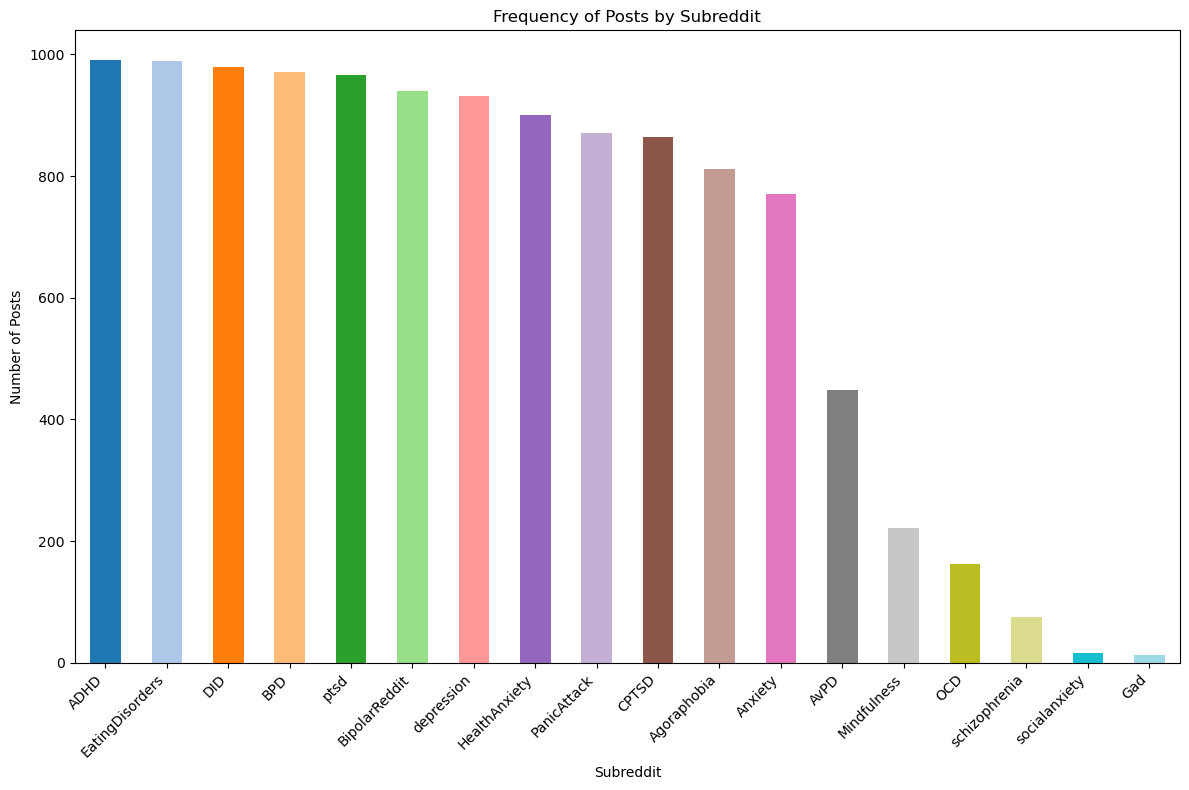

In [53]:
plt.figure(figsize=(12, 8))
freq_subreddit.plot(kind='bar', color=plt.cm.tab20(np.linspace(0, 1, len(freq_subreddit)))) #plotting histogram for freq count based on subreddits
plt.title('Frequency of Posts by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()  

plt.show()

In [1]:
stats = df.groupby('subreddit').agg({'score': 'mean', 'num_comments': 'mean'}).reset_index()

# Sorting the engagement stats by mean score and then mean number of comments for visualization
stats_sorted = stats.sort_values(by=['score', 'num_comments'], ascending=False)

# Adjusting the error and plotting again without the unsupported tick parameter
plt.figure(figsize=(14, 10))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Bar plot for mean score
stats_sorted.plot(kind='bar', x='subreddit', y='score', color='tab:red', ax=ax1, position=1, width=0.4, label='Mean Score')
# Line plot for mean number of comments
stats_sorted.plot(kind='line', x='subreddit', y='num_comments', marker='o', linestyle='-', color='tab:blue', ax=ax2, label='Mean Number of Comments')

ax1.set_xlabel('Subreddit')
ax1.set_ylabel('Mean Score', color='tab:red')
ax2.set_ylabel('Mean Number of Comments', color='tab:blue')

ax1.tick_params(axis='y', colors='tab:red')
ax2.tick_params(axis='y', colors='tab:blue')
plt.xticks(rotation=45, ha="right")

plt.title('Subreddit Engagement: Mean Score and Mean Number of Comments')
plt.show()


NameError: name 'df' is not defined

In [55]:
def preprocessing(text):
    text = text.lower()
    tokens = word_tokenize(text)# tokenizing text
    stop_words = set(stopwords.words('english')) #removing stop words
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer() # lemmatizing the text
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

In [56]:
df['selftext_processed'] = df['selftext'].apply(preprocessing) # applying preprocessing on selftext and tile
df['title_processed'] = df['title'].apply(preprocessing)

In [57]:
df.head()

,id,created_utc,score,num_comments,permalink,url,is_self,is_hidden,stickied,subreddit,upvote_ratio,title,selftext,is_saved,solution,related_links,selftext_processed,title_processed
6,pelip6,1630340728,12802,890,https://reddit.com/r/ADHD/comments/pelip6/how_...,https://www.reddit.com/r/ADHD/comments/pelip6/...,True,False,False,ADHD,0.98,How I cured my adhd permanently,"I've been suffering from adhd my whole life, f...",False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...,"'ve suffering adhd whole life , 26 year . work...",cured adhd permanently
14,ioi1my,1599519237,9594,625,https://reddit.com/r/ADHD/comments/ioi1my/i_we...,https://www.reddit.com/r/ADHD/comments/ioi1my/...,True,False,False,ADHD,1.00,I went through 700 reddit comments and collect...,So there was that awesome [Reddit thread](http...,False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...,awesome [ reddit thread ] ( http : //www.reddi...,went 700 reddit comment collected 131 adhd pro...
16,jeyfps,1603227382,9552,332,https://reddit.com/r/ADHD/comments/jeyfps/adhd...,https://www.reddit.com/r/ADHD/comments/jeyfps/...,True,False,False,ADHD,1.00,ADHD for me is laying down on my couch using m...,It’s not like I don’t care. I’m stressed out o...,False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...,’ like ’ care . ’ stressed mind want good clas...,adhd laying couch using phone calmly rememberi...
17,jjd6hl,1603843302,9463,360,https://reddit.com/r/ADHD/comments/jjd6hl/it_f...,https://www.reddit.com/r/ADHD/comments/jjd6hl/...,True,False,False,ADHD,1.00,It feels like there aren’t enough hours in the...,IM OVER IT.,False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...,im .,"feel like ’ enough hour day reality , 24hrs pl..."
19,kre725,1609900170,9294,670,https://reddit.com/r/ADHD/comments/kre725/its_...,https://www.reddit.com/r/ADHD/comments/kre725/...,True,False,False,ADHD,0.99,It's so damn irritating to be intelligent with...,So I've always been told I'm smart by people w...,False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...,'ve always told 'm smart people get know . nev...,'s damn irritating intelligent adhd . 's like ...


In [58]:
df.to_csv('updated_reddit_posts.csv', index=False)

In [59]:
df.head()

,id,created_utc,score,num_comments,permalink,url,is_self,is_hidden,stickied,subreddit,upvote_ratio,title,selftext,is_saved,solution,related_links,selftext_processed,title_processed
6,pelip6,1630340728,12802,890,https://reddit.com/r/ADHD/comments/pelip6/how_...,https://www.reddit.com/r/ADHD/comments/pelip6/...,True,False,False,ADHD,0.98,How I cured my adhd permanently,"I've been suffering from adhd my whole life, f...",False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...,"'ve suffering adhd whole life , 26 year . work...",cured adhd permanently
14,ioi1my,1599519237,9594,625,https://reddit.com/r/ADHD/comments/ioi1my/i_we...,https://www.reddit.com/r/ADHD/comments/ioi1my/...,True,False,False,ADHD,1.00,I went through 700 reddit comments and collect...,So there was that awesome [Reddit thread](http...,False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...,awesome [ reddit thread ] ( http : //www.reddi...,went 700 reddit comment collected 131 adhd pro...
16,jeyfps,1603227382,9552,332,https://reddit.com/r/ADHD/comments/jeyfps/adhd...,https://www.reddit.com/r/ADHD/comments/jeyfps/...,True,False,False,ADHD,1.00,ADHD for me is laying down on my couch using m...,It’s not like I don’t care. I’m stressed out o...,False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...,’ like ’ care . ’ stressed mind want good clas...,adhd laying couch using phone calmly rememberi...
17,jjd6hl,1603843302,9463,360,https://reddit.com/r/ADHD/comments/jjd6hl/it_f...,https://www.reddit.com/r/ADHD/comments/jjd6hl/...,True,False,False,ADHD,1.00,It feels like there aren’t enough hours in the...,IM OVER IT.,False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...,im .,"feel like ’ enough hour day reality , 24hrs pl..."
19,kre725,1609900170,9294,670,https://reddit.com/r/ADHD/comments/kre725/its_...,https://www.reddit.com/r/ADHD/comments/kre725/...,True,False,False,ADHD,0.99,It's so damn irritating to be intelligent with...,So I've always been told I'm smart by people w...,False,For managing Attention-Deficit/Hyperactivity D...,https://www.who.int/news-room/fact-sheets/deta...,'ve always told 'm smart people get know . nev...,'s damn irritating intelligent adhd . 's like ...


In [60]:
def wordcloud(text, title): # creating wordcloud with the frequency of words used
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

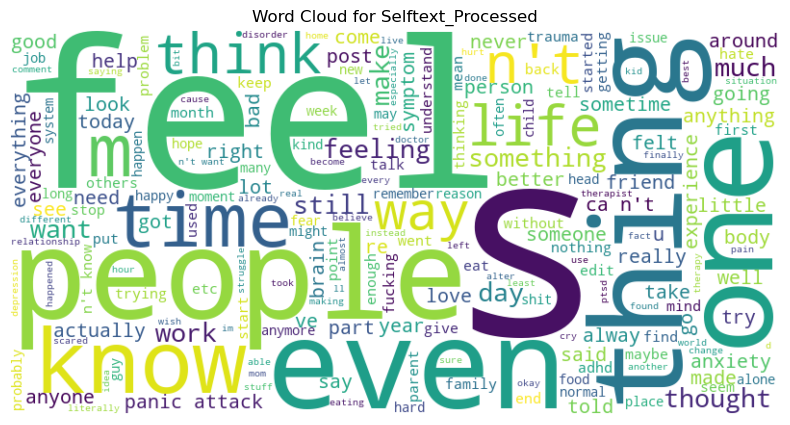

In [66]:
wordcloud(' '.join(df['selftext_processed']), 'Word Cloud for Selftext_Processed') #wordclod for the column selftext processed

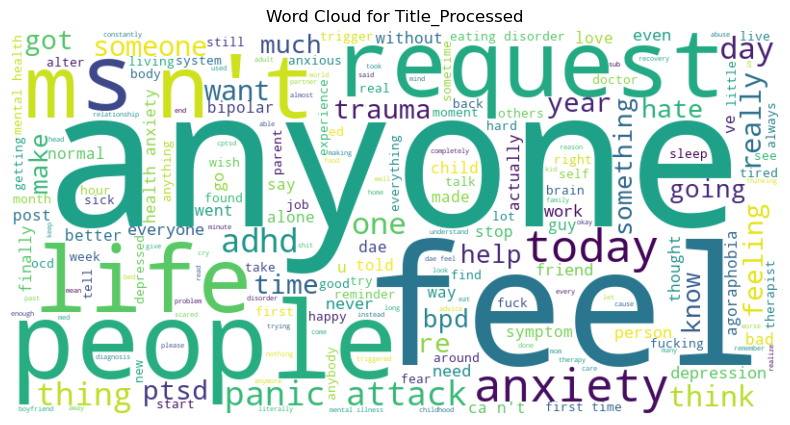

In [67]:
wordcloud(' '.join(df['title_processed']), 'Word Cloud for Title_Processed') # for title processed

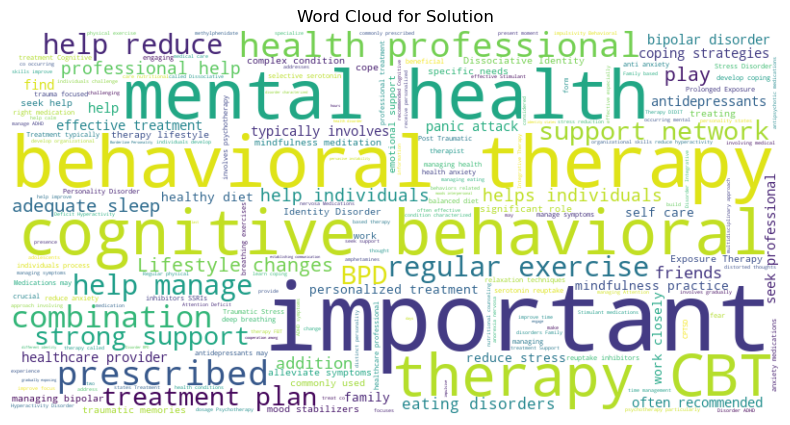

In [63]:
wordcloud(' '.join(df['solution']), 'Word Cloud for Solution') # for solution

# ML 

In [68]:
df['combined_text'] = df['selftext_processed'] + ' ' + df['title_processed'] #Combing the columns self text processed and title processed and creating a new column

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df['combined_text'], df['solution'], random_state=14) # applying train test split

In [70]:
vectorizer = TfidfVectorizer() #applying tdidf vecxtorization on selftext column
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [71]:
model = LogisticRegression() #applying logistic reggression and fitting the model
model.fit(X_train_vec, y_train)

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
y_train_pred = model.predict(X_train_vec) #predicting the processed self text columns
y_test_pred = model.predict(X_test_vec)

In [73]:
train_accuracy = round(accuracy_score(y_train, y_train_pred), 2) #calculating the train and test frequencies
test_accuracy = round(accuracy_score(y_test, y_test_pred), 2)
print('Training Accuracy for the model is:', train_accuracy)
print('Test Accuracy for the model is:', test_accuracy)

Training Accuracy: 0.88
Test Accuracy: 0.72


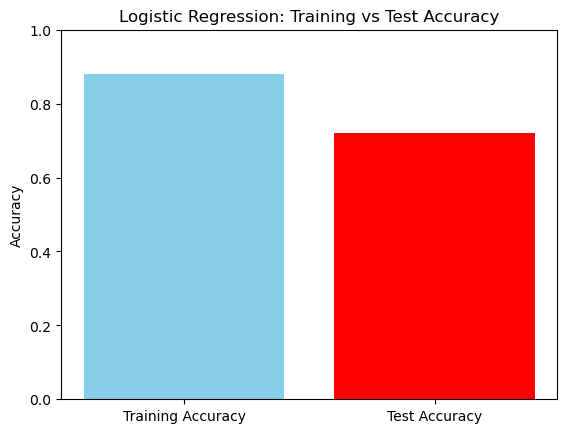

In [74]:
plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['skyblue', 'red']) #Visualizing the comparison of traing and testing accuracies
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Logistic Regression: Training vs Test Accuracy')
plt.show()

In [75]:
y_pred = model.predict(X_test_vec)

In [76]:
accuracy = round(accuracy_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred, average='weighted'), 2)  # using weighted for classification
precision = round(precision_score(y_test, y_pred, average='weighted'), 2)  
print('Accuracy:', accuracy)
print('F1 Score:', f1)
print('Precision:', precision) #calculating and printing f1 score, accuracy and precision

Accuracy: 0.72
F1 Score: 0.71
Precision: 0.72


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes Algorithm

In [77]:
model = MultinomialNB() #Implementing Multinomial naive bayes model and fiting it as per the dataset
model.fit(X_train_vec, y_train)

MultinomialNB()

In [78]:
y_train_pred = model.predict(X_train_vec) # prediting based on the training set
y_test_pred = model.predict(X_test_vec)

In [79]:
train_accuracy = round(accuracy_score(y_train, y_train_pred), 2)
test_accuracy = round(accuracy_score(y_test, y_test_pred), 2)
print('Training Accuracy for the model is:', train_accuracy)
print('Test Accuracy for the model is:', test_accuracy) #calculating accuracies

Training Accuracy: 0.78
Test Accuracy: 0.62


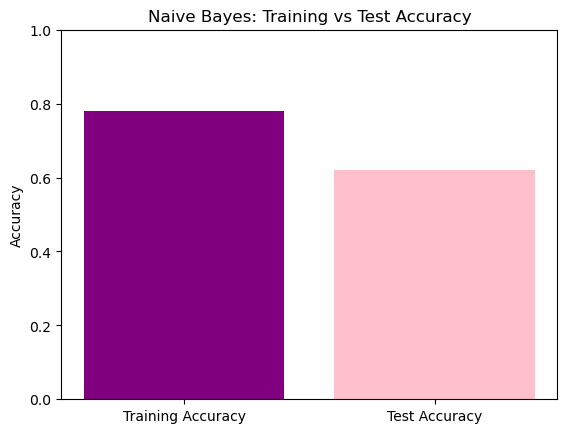

In [80]:
plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['purple', 'pink'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Naive Bayes: Training vs Test Accuracy')
plt.show() #visualizing the comaprison of the 2 accuracies

In [81]:
y_pred = model.predict(X_test_vec)

In [82]:
accuracy = round(accuracy_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred, average='weighted'), 2)  # using weighted for the mclassification
precision = round(precision_score(y_test, y_pred, average='weighted'), 2)  
print('Accuracy:', accuracy)
print('F1 Score:', f1)
print('Precision:', precision) # calculating the evaluation scores

Accuracy: 0.62
F1 Score: 0.58
Precision: 0.65


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Support vector machine

In [83]:
model = SVC(kernel='linear') #implementing support vector machine 
model.fit(X_train_vec, y_train) #fitting the model

SVC(kernel='linear')

In [84]:
y_train_pred = model.predict(X_train_vec)
y_test_pred = model.predict(X_test_vec)

In [85]:
train_accuracy = round(accuracy_score(y_train, y_train_pred), 2)
test_accuracy = round(accuracy_score(y_test, y_test_pred), 2)
print('Training Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy) #calculating both the scores

Training Accuracy: 0.95
Test Accuracy: 0.7


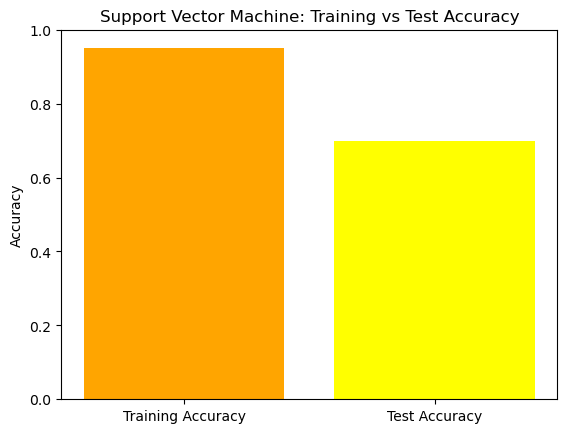

In [86]:
plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['orange', 'yellow'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Support Vector Machine: Training vs Test Accuracy')
plt.show() #visual comparison of the train and test accuracies

In [87]:
y_pred = model.predict(X_test_vec)

In [88]:
accuracy = round(accuracy_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred, average='weighted'), 2)  # using weighted multiclass
precision = round(precision_score(y_test, y_pred, average='weighted'), 2)  
print('Accuracy:', accuracy)
print('F1 Score:', f1)
print('Precision:', precision) #Calculating the the evaluation scores

Accuracy: 0.7
F1 Score: 0.7
Precision: 0.71


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear')
} #storing models in variable

In [90]:
train_accuracies = {}
test_accuracies = {}

In [91]:
for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_train_pred = model.predict(X_train_vec)
    y_test_pred = model.predict(X_test_vec)
    train_accuracies[name] = round(accuracy_score(y_train, y_train_pred), 2)
    test_accuracies[name] = round(accuracy_score(y_test, y_test_pred), 2)

C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


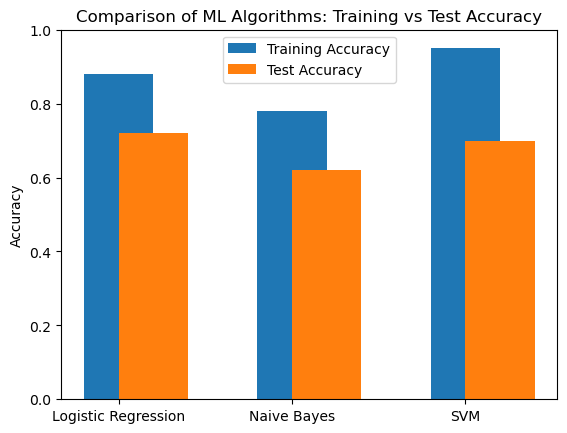

In [92]:
x = range(len(models))
plt.bar(x, train_accuracies.values(), width=0.4, label='Training Accuracy', align='center')
plt.bar(x, test_accuracies.values(), width=0.4, label='Test Accuracy', align='edge')
plt.xticks(x, models.keys())
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of ML Algorithms: Training vs Test Accuracy')
plt.legend()
plt.show() #comaparing themodel accuracies for all the three models

In [109]:
model_perfom = max(test_accuracies, key=test_accuracies.get)
qualified_model = models[model_perfom] #dispplaying the best model

In [112]:
joblib.dump(qualified_model, f'{model_perfom}_model.pkl') #saving the model

['Logistic Regression_model.pkl']

In [113]:
joblib.dump(vectorizer, 'vectorizer.pkl')  #saving vectorizers

['vectorizer.pkl']

# GUI

In [2]:
class ChatBotUI(QMainWindow):  #creating chat bot
    def __init__(self):
        super().__init__()
        
        self.model = joblib.load('Logistic Regression_model.pkl') # Loading the  saved logistic regression model and TF-IDF vectorizer
        self.vectorizer = joblib.load('vectorizer.pkl')
        
        self.df = pd.read_csv('updated_reddit_posts.csv')  # Loading the dataset
        self.df['selftext_processed'] = self.df['selftext_processed'].fillna('')
        self.initUI()

    def initUI(self):  #creating interface for chatbot
        self.setWindowTitle('Mental Health Chatbot')  #title of chat bot
        self.setFixedSize(520, 690)
        self.central_widget = QWidget(self)
        self.layout = QVBoxLayout(self.central_widget)
        self.background = QPixmap('healthy-body-healthy-mind-800x600.png')  #adding background
        self.setCentralWidget(self.central_widget)

        self.chat_history = QTextEdit(self)  #body of the chatbot
        self.chat_history.setReadOnly(True)
        self.chat_history.setStyleSheet("""
            background-color: rgba(44, 44, 44, 0.5);
            border: 1px solid #767676;
            border-radius: 10px;
            color: white;
            font-family: 'Arial';
            padding: 5px;
        """)
        self.layout.addWidget(self.chat_history)

        self.message_input = QLineEdit(self)
        self.message_input.setStyleSheet("""
            background-color: rgba(51, 51, 51, 0.5);
            color: white;
            border-radius: 15px;
            border: 2px solid #555555;
            padding: 10px;
            font-size: 16px;
        """)
        self.layout.addWidget(self.message_input)

        self.send_button = QPushButton('Send', self)
        self.send_button.setStyleSheet("""
            background-color: #4CAF50;
            color: white;
            border-radius: 15px;
            font-size: 16px;
        """)
        self.layout.addWidget(self.send_button)
        self.send_button.clicked.connect(self.process_user_input)

        self.central_widget.setLayout(self.layout)

    def process_user_input(self):   
        user_input = self.message_input.text().strip()
        if user_input:   #user input greeting and appending and giving solution for problem
            greetings = ['hi', 'hello', 'hey', 'greetings', 'good morning', 'good afternoon', 'good evening']
            if user_input.lower() in greetings:
                self.chat_history.append(f"<div style='text-align: right; color: white; font-size: 18px;'>You: {user_input}</div>")
                self.chat_history.append(f"<div style='text-align: left; color: white; font-size: 18px;'>Bot: Hello! How can I assist you today?</div>")
            else:
                self.chat_history.append(f"<div style='text-align: right; color: white; font-size: 18px;'>You: {user_input}</div>")
                user_input_vectorized = self.vectorizer.transform([user_input])
                prediction = self.model.predict(user_input_vectorized)
                response = self.interpret_prediction(prediction[0])
                self.chat_history.append(f"<div style='text-align: left; color: white; font-size: 18px;'>Bot: {response}</div>")
                similar_result = self.find_similar_texts(user_input)
                # self.chat_history.append(f"<div style='text-align: left; color: white; font-size: 24px;'>Similar case: {similar_result['matched_text']}</div>")
                self.chat_history.append(f"<div style='text-align: left; color: white; font-size: 18px;'>Suggested solution: {similar_result['solution']}</div>")
            self.message_input.clear()

    def find_similar_texts(self, user_input):  #finding the similar text to the problem and getting solution for it 
        user_vector = self.vectorizer.transform([user_input])
        document_vectors = self.vectorizer.transform(self.df['selftext_processed'])
        similarities = cosine_similarity(user_vector, document_vectors)
        most_similar_idx = np.argmax(similarities)
        matched_entry = self.df.iloc[most_similar_idx]
        return {
            # 'matched_text': matched_entry['selftext_processed'],
            'solution': matched_entry['solution'],
            'related_links': matched_entry['related_links']
        }

    def interpret_prediction(self, prediction):  #else condition if chatbot don't understand the input
        if prediction == 1:
            return "It sounds like you might be feeling stressed. Would you like some tips on managing stress?"
        else:
            return "Tell me more about how you are feeling."

    def paintEvent(self, event):
        painter = QPainter(self)
        painter.drawPixmap(self.rect(), self.background)

In [3]:
if __name__ == '__main__':
    app = QApplication(sys.argv)
    
    ex = ChatBotUI()
    ex.show()
    sys.exit(app.exec_())

SystemExit: 0

C:\Users\rahul\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
